# ALMA-IMF/SPICY Comparison

In [3]:
import imp, table_loading
imp.reload(table_loading)

/scratch/local/62564577/ipykernel_65012/4286726267.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, table_loading


<module 'table_loading' from '/blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/BriceTingle/table_loading.py'>

In [4]:
from table_loading import *

In [5]:
import os

In [6]:
from astropy.stats import mad_std

In [7]:
from astropy.visualization import simple_norm

In [8]:
pl.style.use('dark_background')
pl.rcParams['font.size'] = 16

In [201]:
filepath = f'/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/BriceTingle'
#filepath = f'/blue/adamginsburg/btingle'
mipsview = False

In [202]:
ls '/blue/adamginsburg/btingle/SED_plots/G12'

77416.jpg  77443.jpg  77452.jpg  77462.jpg  77498.jpg  77507.jpg
77416.pdf  77443.pdf  77452.pdf  77462.pdf  77498.pdf  77507.pdf
77428.jpg  77447.jpg  77454.jpg  77465.jpg  77504.jpg
77428.pdf  77447.pdf  77454.pdf  77465.pdf  77504.pdf


In [203]:
apertures_both = {
    "north": [2, 2, 2, 2.4, 2.4, 2.4, 2.4, 6, 10, 13.5, 23, 30, 41, 3, 3]*u.arcsec,
    "south": [1.415, 1.415, 1.415, 1.415, 1.415, 2.4, 2.4, 2.4, 2.4, 6, 10, 13.5, 23, 30, 41, 3, 3]*u.arcsec,
    }

In [204]:
distances = {
    "W51-E": 5.4,
    "W43MM1": 5.5,
    "G333": 4.2,
    "W51IRS2": 5.4,
    "G338": 3.9,
    "G10": 4.95,
    "W43MM2": 5.5,
    "G008": 3.4,
    "G12": 2.4,
    "G327": 2.5,
    "W43MM3": 5.5,
    "G351": 2.0,
    "G353": 2.0,
    "G337": 2.7,
    "G328": 2.5,
}

In [205]:
ls /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/

2MASS/  Herschel/  JWST/  Paranal/  Spitzer/  user_filters/  WISE/


In [206]:
ls /home/

btingle/


# Region Prep

## Location Figures

In [15]:
fieldid = 'W51-E'

In [1]:
fieldids

NameError: name 'fieldids' is not defined

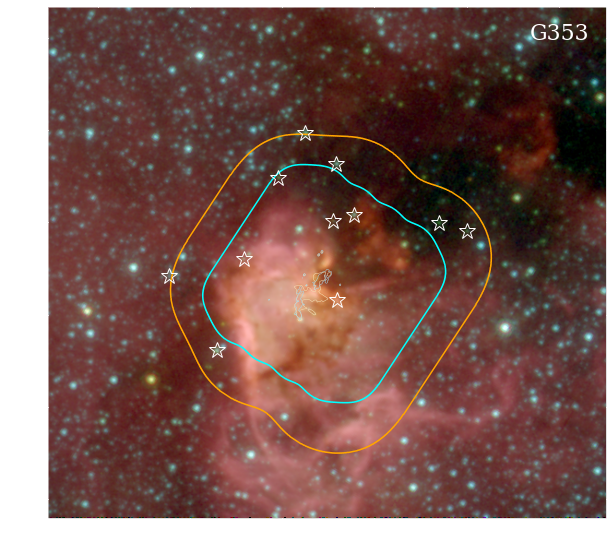

In [12]:
for fieldid in ['G10','G12','W43MM1','W43MM2','W43MM3','W51-E','W51IRS2','G008','G327','G328','G333','G337','G338','G351','G353']:
    fulltbl, fullcoords = get_spicy_tbl()
    tbl = find_ALMAIMF_matches(fulltbl, fullcoords)
    #fulltbl = Table.read('/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits')
    #fullcoords = SkyCoord(fulltbl['l'], fulltbl['b'], frame='galactic', unit=(u.deg, u.deg))

    tbl = fulltbl[fulltbl['ALMAIMF_FIELDID'] == fieldid]
    tbl.add_index('SPICY')
    tbl.sort('SPICY')
    
    sourceids = []
    for spicyid in tbl['SPICY']:
        sourceids.append(spicyid)
    
    fig = show_source_on_spitzer(fieldid,fullcoords,None,mips=False)
    fig.savefig(f'/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/BriceTingle/{fieldid}.jpg', format="jpg")

In [16]:
def locfig_function(fieldid):
    
    fulltbl, fullcoords = get_spicy_tbl()
    tbl = find_ALMAIMF_matches(fulltbl, fullcoords)
    #fulltbl = Table.read('/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits')
    #fullcoords = SkyCoord(fulltbl['l'], fulltbl['b'], frame='galactic', unit=(u.deg, u.deg))

    tbl = fulltbl[fulltbl['ALMAIMF_FIELDID'] == fieldid]
    tbl.add_index('SPICY')
    tbl.sort('SPICY')
    
    sourceids = []
    for spicyid in tbl['SPICY']:
        sourceids.append(spicyid)
        
    print(sourceids)
        
    for source in sourceids:
        fig = show_source_on_spitzer(fieldid,fullcoords,source,mips=mipsview)
        fig.savefig(f'{filepath}/Location_figures/{fieldid}/{source}.pdf', format="pdf")
        fig.savefig(f'{filepath}/Location_figures/{fieldid}/{source}.jpg', format="jpg")
        
#    try:
#        sourceids = []
#        
#        for spicyid in tbl['SPICY']:
#            sourceids.append(spicyid)
#        
#        for source in sourceids:
#            fig = show_source_on_spitzer(fieldid,fullcoords,source,mips=mipsview)
#            fig.savefig(f'{filepath}/Location_figures/{fieldid}/{source}.pdf', format="pdf",overwrite=True)
        
#    except AttributeError:
#        print(f"Error encountered which indicates that {fieldid} only has one source match! If this is true, ignore.")
#        source, sourceids = [tbl['SPICY']], [tbl['SPICY']]
#        fig = show_source_on_spitzer(fieldid,fullcoords,source,mips=mipsview)
#        fig.savefig(f'{filepath}/Location_figures/{fieldid}/{source}.pdf', format="pdf", overwrite=True)
        
    return fig, sourceids

  0%|                                                    | 0/15 [00:00<?, ?it/s]

[31362, 31366, 31367, 31389, 31390, 31395, 31405, 31415, 31420, 31423, 31431, 31432, 31438, 31441, 31444, 31453, 31463]


  7%|██▊                                        | 1/15 [02:05<29:15, 125.36s/it]

[36252, 36263]


 13%|█████▊                                      | 2/15 [02:40<15:38, 72.16s/it]

[77416, 77428, 77443, 77447, 77452, 77454, 77462, 77465, 77498, 77504, 77507]


 20%|████████▊                                   | 3/15 [03:52<14:26, 72.21s/it]

[102000, 102002, 102007]


 27%|███████████▋                                | 4/15 [04:28<10:37, 57.93s/it]

[73642, 73650, 73653, 73659, 73662, 73668, 73673, 73675, 73676, 73678, 73683, 73695, 73698]


 33%|██████████████▋                             | 5/15 [06:05<11:58, 71.90s/it]

[30375, 30411, 30414, 30416, 30423, 30425]


 40%|█████████████████▌                          | 6/15 [07:01<09:59, 66.62s/it]

[75717, 75725, 75735, 75743, 75752, 75756, 75767, 75788]


 47%|████████████████████▌                       | 7/15 [08:06<08:47, 65.92s/it]

[40311, 40312, 40328, 40343, 40344, 40362, 40365, 40367, 40380, 40382]


 53%|███████████████████████▍                    | 8/15 [09:23<08:07, 69.66s/it]

[40114, 40135, 40136, 40141, 40158]


 60%|██████████████████████████▍                 | 9/15 [10:11<06:17, 62.88s/it]

[54167, 54182, 54188, 54189, 54192, 54197, 54200, 54207, 54212, 54213, 54221, 54222, 54224, 54228, 54233, 54235, 54251, 54254, 54255, 54265, 54268]


 67%|████████████████████████████▋              | 10/15 [12:16<06:49, 81.99s/it]

[55853, 55858, 55859, 55862, 55873, 55876, 55881, 55896, 55901, 55924, 55932]


 73%|███████████████████████████████▌           | 11/15 [13:28<05:15, 78.78s/it]

[92076]


 80%|██████████████████████████████████▍        | 12/15 [13:49<03:04, 61.44s/it]

[91989, 92015, 92039, 92043, 92055, 92056]


 87%|█████████████████████████████████████▎     | 13/15 [14:47<02:00, 60.25s/it]

[92074, 92122]


 93%|████████████████████████████████████████▏  | 14/15 [15:14<00:50, 50.30s/it]

[102038, 102062]


100%|███████████████████████████████████████████| 15/15 [15:38<00:00, 62.58s/it]


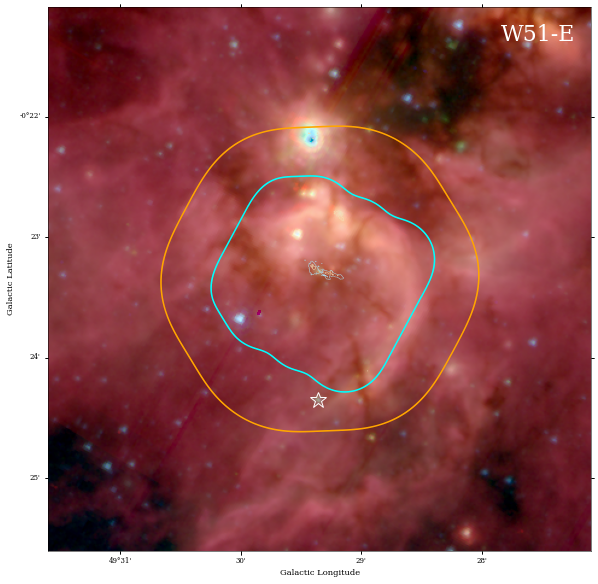

In [17]:
for fieldid in tqdm(prefixes.keys()):
    locfig_function(fieldid)

## ALMA Imaging

In [9]:
fieldid = 'W43MM3'

In [10]:
def alma_imaging(tbl, fieldid, aperture_radius=3*u.arcsec,
                        annulus_inner=3*u.arcsec, annulus_outer=5*u.arcsec,
                        basepath='/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults',
                        band='b3', wlname='3mm'):

    pfxs = prefixes[fieldid]
    cube = SpectralCube.read(basepath + '/' + pfxs[f'finaliter_prefix_{band}']+".image.tt0.fits",
                             format='fits', use_dask=False).minimal_subcube()
    alma_rms = cube.mad_std()

    ww = cube.wcs.celestial
    ww._naxis = cube.shape[1:]

    fig = pl.figure(figsize=(10,10))
    ax = fig.add_subplot(projection=ww)
    ax.imshow(cube[0].value, norm=simple_norm(cube[0].value, max_percent=99., min_percent=1, stretch='asinh'))
        
    match = tbl['ALMAIMF_FIELDID'] == fieldid

    crds = SkyCoord(tbl['ra'], tbl['dec'])[match]
        
    ax.plot(crds.fk5.ra.deg, crds.fk5.dec.deg, 'wo', mfc='none', mec='r', markersize=10, transform=ax.get_transform('fk5'), )
        
    alma_rms = cube.mad_std()
        
    return alma_rms

In [94]:
alma_imaging(tbl, fieldid, band='b3', wlname='3mm'), alma_imaging(tbl, fieldid, band='b6', wlname='1mm')

(<Quantity 7.48301919e-05 Jy / beam>, <Quantity 0.0002602 Jy / beam>)

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 0).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 0).

<Figure size 720x720 with 1 Axes>

## Table

### From-scratch Assembly

In [18]:
fieldid = 'G008'

#### Assembly

In [19]:
tbl, coords = get_spicy_tbl()
tbl = find_ALMAIMF_matches(tbl, coords)
# CROP BASED ON IF IN ALMA-IMF
tblmsk = tbl['in_ALMAIMF']
tbl = tbl[tblmsk]
coords = coords[tblmsk]
# CROP BASED ON IF IN GIVEN FIELD
tblmask = Table([tbl['ALMAIMF_FIELDID'] == fieldid])['col0']
tbl = tbl[tblmask]
coords = coords[tblmask]

In [20]:
tbl

<Table length=13>
SPICY     ra        dec     ...      ZTFDR3     in_ALMAIMF ALMAIMF_FIELDID
         deg        deg     ...                                           
int64  float64    float64   ...      int64         bool         bytes8    
----- ---------- ---------- ... --------------- ---------- ---------------
73642 271.576385 -21.618896 ...              --       True            G008
73650 271.580146 -21.631193 ...              --       True            G008
73653 271.581761 -21.626881 ...              --       True            G008
73659 271.587379 -21.627898 ...              --       True            G008
73662 271.589849 -21.638591 ...              --       True            G008
73668 271.592338 -21.640527 ...              --       True            G008
73673 271.598592 -21.619073 ...              --       True            G008
73675 271.600004 -21.611082 ...              --       True            G008
73676 271.600214  -21.60446 ...              --       True            G008
73678 271.600435 -21.620869 ...              --       True            G008
73683 271.603133 -21.620625 ...              --       True            G008
73695 271.608717 -21.601685 ...              --       True            G008
73698 271.609884 -21.597934 ... 282215400011450       True            G008

In [21]:
is_ukidss = np.any([x != '                   ' for x in [tbl['UKIDSS']]])
is_virac = np.any([x != np.ma.masked for x in [tbl['VIRAC']]])

print(is_ukidss, is_virac)
if is_ukidss and not is_virac:
    sed_filters, wavelength_dict, filternames, zpts = get_filters("north")
    apertures = apertures_both["north"]
elif is_virac and not is_ukidss:
    sed_filters, wavelength_dict, filternames, zpts = get_filters("south")
    apertures = apertures_both["south"]
elif fieldid == 'W43MM3':
    sed_filters, wavelength_dict, filternames, zpts = get_filters("north")
    apertures = apertures_both["north"]
    is_ukidss = True
else:
    print("ERROR: SOMETHING WENT WRONG, CHECK TABLE")

False True


#### Adding Data

In [22]:
print("Adding Herschel data")
tbl = add_herschel_limits(tbl, coords)

Adding Herschel data


 15%|██████▊                                     | 2/13 [00:01<00:07,  1.39it/s]

Failed match between <SkyCoord (Galactic): (l, b) in deg
    (8.669308, -0.358667)> and /orange/adamginsburg/higal/Field8_0_PACS_SpirePacsParallel_70_1342218963-1342218964_jscanam.fits


 31%|█████████████▌                              | 4/13 [00:02<00:04,  1.89it/s]

Failed match between <SkyCoord (Galactic): (l, b) in deg
    (8.669308, -0.358667)> and /orange/adamginsburg/higal/Field6_0_PACS_SpirePacsParallel_70_1342214763-1342214764_jscanam.fits


 54%|███████████████████████▋                    | 7/13 [00:03<00:01,  3.19it/s]

Failed match between <SkyCoord (Galactic): (l, b) in deg
    (8.683759, -0.368514)> and /orange/adamginsburg/higal/Field8_0_PACS_SpirePacsParallel_70_1342218963-1342218964_jscanam.fits
Failed match between <SkyCoord (Galactic): (l, b) in deg
    (8.683759, -0.368514)> and /orange/adamginsburg/higal/Field6_0_PACS_SpirePacsParallel_70_1342214763-1342214764_jscanam.fits


100%|███████████████████████████████████████████| 13/13 [00:04<00:00,  2.97it/s]


In [23]:
print("Adding MIPS match data")
tbl = add_MIPS_matches(tbl)

Adding MIPS match data


In [24]:
tbl.sort('SPICY')

In [25]:
print("Adding MIPS limit data")
tbl = add_mips_limits(tbl, coords)

Adding MIPS limit data


100%|███████████████████████████████████████████| 13/13 [00:03<00:00,  3.97it/s]


In [26]:
tbl

<Table length=13>
SPICY     ra        dec        l     ...   S24     e_S24  M24_flux_uplim
         deg        deg       deg    ...   mJy      mJy      MJy / sr   
int64  float64    float64   float64  ... float64  float32    float32    
----- ---------- ---------- -------- ... -------- ------- --------------
73642 271.576385 -21.618896 8.673839 ...       --      --      121.33896
73650 271.580146 -21.631193 8.664812 ...       --      --       94.72568
73653 271.581761 -21.626881 8.669308 ...       --      --      187.26851
73659 271.587379 -21.627898  8.67097 ...       --      --      518.52936
73662 271.589849 -21.638591 8.662757 ...       --      --      263.07068
73668 271.592338 -21.640527 8.662196 ...       --      --      2406.1794
73673 271.598592 -21.619073 8.683759 ...       --      --       197.2128
73675 271.600004 -21.611082 8.691375 ...       --      --      34.525635
73676 271.600214  -21.60446 8.697251 ...       --      --      34.481247
73678 271.600435 -21.620869 8.683028 ...       --      --       77.02405
73683 271.603133 -21.620625 8.684464 ...  150.080   2.765      116.20179
73695 271.608717 -21.601685 8.703531 ...  600.561  13.043       437.4067
73698 271.609884 -21.597934 8.707334 ...       --      --       39.75328

In [27]:
print("Adding VVV data")
try:
    tbl = add_VVV_matches(tbl)
    has_VVV = True
except IndexError:
    print("No VIRAC matches found.")
    has_VVV = False

Adding VVV data


In [28]:
tbl

<Table length=13>
SPICY     ra        dec        l     ... Zdetflg Ydetflg Jdetflg Hdetflg
         deg        deg       deg    ...                                
int64  float64    float64   float64  ...  uint8   uint8   uint8   uint8 
----- ---------- ---------- -------- ... ------- ------- ------- -------
73642 271.576385 -21.618896 8.673839 ...       1       1       1       1
73650 271.580146 -21.631193 8.664812 ...      --      --      --      --
73653 271.581761 -21.626881 8.669308 ...       1       1       1       1
73659 271.587379 -21.627898  8.67097 ...       1       0       0       0
73662 271.589849 -21.638591 8.662757 ...       1       1       1       0
73668 271.592338 -21.640527 8.662196 ...       1       1       1       1
73673 271.598592 -21.619073 8.683759 ...      --      --      --      --
73675 271.600004 -21.611082 8.691375 ...       1       1       1       1
73676 271.600214  -21.60446 8.697251 ...       0       0       0       0
73678 271.600435 -21.620869 8.683028 ...       1       1       1       1
73683 271.603133 -21.620625 8.684464 ...       1       1       0       0
73695 271.608717 -21.601685 8.703531 ...       1       1       1       1
73698 271.609884 -21.597934 8.707334 ...       0       0       0       0

In [29]:
print("Adding UKIDSS data")
try:
    tbl = add_UKIDSS_matches(tbl)
    has_UKIDSS = True
except IndexError:
    print("No UKIDSS matches found.")
    has_UKIDSS = False

Adding UKIDSS data
No UKIDSS matches found.


In [30]:
if fieldid == 'W43MM3':
    for x in ['Jmag','e_Jmag','Hmag','e_Hmag','Kmag1','e_Kmag1']:
        tbl.add_column(0.0, name=x)
        tbl[x] = table.MaskedColumn(tbl[x])
        tbl[x].mask = True

In [31]:
tbl

<Table length=13>
SPICY     ra        dec        l     ... Zdetflg Ydetflg Jdetflg Hdetflg
         deg        deg       deg    ...                                
int64  float64    float64   float64  ...  uint8   uint8   uint8   uint8 
----- ---------- ---------- -------- ... ------- ------- ------- -------
73642 271.576385 -21.618896 8.673839 ...       1       1       1       1
73650 271.580146 -21.631193 8.664812 ...      --      --      --      --
73653 271.581761 -21.626881 8.669308 ...       1       1       1       1
73659 271.587379 -21.627898  8.67097 ...       1       0       0       0
73662 271.589849 -21.638591 8.662757 ...       1       1       1       0
73668 271.592338 -21.640527 8.662196 ...       1       1       1       1
73673 271.598592 -21.619073 8.683759 ...      --      --      --      --
73675 271.600004 -21.611082 8.691375 ...       1       1       1       1
73676 271.600214  -21.60446 8.697251 ...       0       0       0       0
73678 271.600435 -21.620869 8.683028 ...       1       1       1       1
73683 271.603133 -21.620625 8.684464 ...       1       1       0       0
73695 271.608717 -21.601685 8.703531 ...       1       1       1       1
73698 271.609884 -21.597934 8.707334 ...       0       0       0       0

In [32]:
tbl.sort('SPICY')
tbl['UKIDSS'][tbl['UKIDSS'] == '0.0'] = -99999
tbl['UKIDSS'].mask = [tbl['UKIDSS'] == '-99999']

In [33]:
tbl

<Table length=13>
SPICY     ra        dec        l     ... Zdetflg Ydetflg Jdetflg Hdetflg
         deg        deg       deg    ...                                
int64  float64    float64   float64  ...  uint8   uint8   uint8   uint8 
----- ---------- ---------- -------- ... ------- ------- ------- -------
73642 271.576385 -21.618896 8.673839 ...       1       1       1       1
73650 271.580146 -21.631193 8.664812 ...      --      --      --      --
73653 271.581761 -21.626881 8.669308 ...       1       1       1       1
73659 271.587379 -21.627898  8.67097 ...       1       0       0       0
73662 271.589849 -21.638591 8.662757 ...       1       1       1       0
73668 271.592338 -21.640527 8.662196 ...       1       1       1       1
73673 271.598592 -21.619073 8.683759 ...      --      --      --      --
73675 271.600004 -21.611082 8.691375 ...       1       1       1       1
73676 271.600214  -21.60446 8.697251 ...       0       0       0       0
73678 271.600435 -21.620869 8.683028 ...       1       1       1       1
73683 271.603133 -21.620625 8.684464 ...       1       1       0       0
73695 271.608717 -21.601685 8.703531 ...       1       1       1       1
73698 271.609884 -21.597934 8.707334 ...       0       0       0       0

In [34]:
print("Adding ALMA-IMF photometry")
tbl = add_alma_photometry(tbl, band='b3', wlname='3mm')
tbl = add_alma_photometry(tbl, band='b6', wlname='1mm')

Adding ALMA-IMF photometry


#### Tweaking Table

In [35]:
if is_ukidss:
    magcols = ['Jmag', 'Hmag', 'Kmag1','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0']
    emagcols = ['e_Jmag', 'e_Hmag', 'e_Kmag1','e_mag3_6', 'e_mag4_5', 'e_mag5_8', 'e_mag8_0']
elif is_virac:
    magcols = ['Ymag', 'Zmag', 'Jmag', 'Hmag', 'Ksmag','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0']
    emagcols = ['Yell', 'Zell', 'Jell', 'Hell', 'KsEll','e_mag3_6', 'e_mag4_5', 'e_mag5_8', 'e_mag8_0']
else:
    print("ERROR!")

In [36]:
print("Converting magnitudes to fluxes")
tbl = mag_to_flux(tbl, magcols, emagcols, zpts, filternames)

Converting magnitudes to fluxes
Ymag Paranal/VISTA.Y
Zmag Paranal/VISTA.Z
Jmag Paranal/VISTA.J
Hmag Paranal/VISTA.H
Ksmag Paranal/VISTA.Ks
mag3_6 Spitzer/IRAC.I1
mag4_5 Spitzer/IRAC.I2
mag5_8 Spitzer/IRAC.I3
mag8_0 Spitzer/IRAC.I4


In [37]:
print("Fixing MIPS upper limits")
tbl.rename_column('S24', 'Spitzer/MIPS.24mu_flux')
tbl.rename_column('e_S24', 'Spitzer/MIPS.24mu_eflux')

Fixing MIPS upper limits


In [38]:
print("Converting ALMA fluxes to mJy/beam")
for colname in ['ALMA-IMF_3mm_flux', 'ALMA-IMF_3mm_eflux', 'ALMA-IMF_1mm_flux', 'ALMA-IMF_1mm_eflux']:
    tbl[colname] = tbl[colname] * u.Jy / u.beam
    tbl[colname] = tbl[colname].to(u.mJy / u.beam)

Converting ALMA fluxes to mJy/beam


In [39]:
tbl

<Table length=13>
SPICY     ra        dec     ... Spitzer/IRAC.I4_flux Spitzer/IRAC.I4_eflux
         deg        deg     ...                               mag         
int64  float64    float64   ...       float64               float64       
----- ---------- ---------- ... -------------------- ---------------------
73642 271.576385 -21.618896 ...                   --                    --
73650 271.580146 -21.631193 ...   14.796864215286911    0.4751286608890844
73653 271.581761 -21.626881 ...   1.6802350136491788   0.16339899870875535
73659 271.587379 -21.627898 ...                   --                    --
73662 271.589849 -21.638591 ...   12.687317786308126    0.4772293618144952
73668 271.592338 -21.640527 ...    726.7245275142893    14.667833601180098
73673 271.598592 -21.619073 ...    6.946559996003595   0.36326046517454336
73675 271.600004 -21.611082 ...     9.53607702904674   0.33245038114833875
73676 271.600214  -21.60446 ...                   --                    --
73678 271.600435 -21.620869 ...   5.7778979892618265   0.25443954649545975
73683 271.603133 -21.620625 ...    66.82975362504618     3.310831763814849
73695 271.608717 -21.601685 ...   37.685113459829566     0.968057933002373
73698 271.609884 -21.597934 ...    3.913537222516416    0.2764608621252323

In [40]:
print("Adding SPICY upper limits")

spicyupperlims = {"I1": 0.3039681249127658,
                  "I2": 0.5928459918761592,
                  "I3": 0.787638041321162,
                  "I4": 0.8397879505963216,}

for key in spicyupperlims.keys():
    if f'Spitzer/IRAC.{key}_flux' and f'Spitzer/IRAC.{key}_eflux' in tbl.keys():
        tbl[f'Spitzer/IRAC.{key}_flux'] = table.MaskedColumn(tbl[f'Spitzer/IRAC.{key}_flux'])
        tbl[f'Spitzer/IRAC.{key}_eflux'] = table.MaskedColumn(tbl[f'Spitzer/IRAC.{key}_eflux'])
        tbl[f'Spitzer/IRAC.{key}_flux'].unit = u.mJy
        tbl[f'Spitzer/IRAC.{key}_eflux'].unit = u.mJy
        tbl[f'Spitzer/IRAC.{key}_eflux'].fill_value = spicyupperlims[key]
        try:
            tbl[f'Spitzer/IRAC.{key}_eflux'] = tbl[f'Spitzer/IRAC.{key}_eflux'].filled()
        except AttributeError:
            print(f"Column {key} has no masked values")
    else: print(f'{key} band not found.')

Adding SPICY upper limits


In [66]:
print("Adding VIRAC upper limits")

vistaupperlims = {"Y": 0.02084540283203125,
                  "Z": 0.014287492998478904,
                  "J": 0.0245767,
                  "H": 0.025805469092337628,
                  "Ks": 0.042246558,}

for key in vistaupperlims.keys():
    if f'Paranal/VISTA.{key}_flux' and f'Paranal/VISTA.{key}_eflux' in tbl.keys():
        tbl[f'Paranal/VISTA.{key}_flux'].unit = u.mJy
        tbl[f'Paranal/VISTA.{key}_eflux'].unit = u.mJy
        tbl[f'Paranal/VISTA.{key}_eflux'].fill_value = vistaupperlims[key]
        tbl[f'Paranal/VISTA.{key}_eflux'] = tbl[f'Paranal/VISTA.{key}_eflux'].filled()
    else: print(f'{key} band not found.')

Adding VIRAC upper limits
Y band not found.
Z band not found.
J band not found.
H band not found.
Ks band not found.


In [67]:
print("Adding UKIDSS upper limits")

ukidssupperlims = {"J": 0.0221,
                  "H": 0.0323,
                  "K": 0.0415,}

for key in ukidssupperlims.keys():
    if f'UKIRT/UKIDSS.{key}_flux' and f'UKIRT/UKIDSS.{key}_eflux' in tbl.keys():
        tbl[f'UKIRT/UKIDSS.{key}_flux'].unit = u.mJy
        tbl[f'UKIRT/UKIDSS.{key}_eflux'].unit = u.mJy
        tbl[f'UKIRT/UKIDSS.{key}_eflux'].fill_value = ukidssupperlims[key]
        tbl[f'UKIRT/UKIDSS.{key}_eflux'] = tbl[f'UKIRT/UKIDSS.{key}_eflux'].filled()
    else: print(f'{key} band not found.')

Adding UKIDSS upper limits
J band not found.
H band not found.
K band not found.


In [68]:
print("Converting Herschel fluxes to upper limits")
tbl["Herschel/Pacs.blue_eflux"] = (tbl['70' ].quantity * u.pixel).to(u.mJy)
tbl["Herschel/Pacs.red_eflux"]  = (tbl['160'].quantity * u.pixel).to(u.mJy)
tbl["Herschel/SPIRE.PSW_eflux"] = (tbl['250'].quantity * Herschel_Beams['250']).to(u.mJy)
tbl["Herschel/SPIRE.PMW_eflux"] = (tbl['350'].quantity * Herschel_Beams['350']).to(u.mJy)
tbl["Herschel/SPIRE.PLW_eflux"] = (tbl['500'].quantity * Herschel_Beams['500']).to(u.mJy)

tbl["Herschel/Pacs.blue_flux"] = np.nan 
tbl["Herschel/Pacs.red_flux"]  = np.nan
tbl["Herschel/SPIRE.PSW_flux"] = np.nan 
tbl["Herschel/SPIRE.PMW_flux"] = np.nan 
tbl["Herschel/SPIRE.PLW_flux"] = np.nan

Converting Herschel fluxes to upper limits


#### Editing

In [69]:
tbl['SPICY','

SyntaxError: EOL while scanning string literal (1981097157.py, line 1)

#### Save Table

In [70]:
tbl

<Table length=11>
SPICY     ra        dec         l     ... Herschel/SPIRE.PSW_flux Herschel/SPIRE.PMW_flux Herschel/SPIRE.PLW_flux
         deg        deg        deg    ...                                                                        
int64  float64    float64    float64  ...         float64                 float64                 float64        
----- ---------- ---------- --------- ... ----------------------- ----------------------- -----------------------
77416 273.538572 -17.933982 12.792094 ...                     nan                     nan                     nan
77428 273.546982 -17.941537 12.789285 ...                     nan                     nan                     nan
77443 273.552721 -17.953921 12.781019 ...                     nan                     nan                     nan
77447 273.553744 -17.943752 12.790416 ...                     nan                     nan                     nan
77452 273.558495 -17.936876 12.798616 ...                     nan                     nan                     nan
77454 273.559347 -17.908208 12.824183 ...                     nan                     nan                     nan
77462 273.561998 -17.927378 12.808552 ...                     nan                     nan                     nan
77465 273.565554 -17.904442 12.830314 ...                     nan                     nan                     nan
77498 273.576952 -17.912003 12.828858 ...                     nan                     nan                     nan
77504 273.580057 -17.911311 12.830878 ...                     nan                     nan                     nan
77507 273.582469 -17.906571 12.836139 ...                     nan                     nan                     nan

In [71]:
if is_ukidss:
    tbl.meta['description'] = 'UKIDSS catalog'

In [72]:
tbl.write(f'{filepath}/Region_tables/Unfitted/{fieldid}', format='fits', overwrite=True)

# Fitting

In [207]:
for field in ukidss_fields:
    print(field, len(Table.read(f'{filepath}/Region_tables/Unfitted/{field}', format='fits')))
for field in virac_fields:
    print(field, len(Table.read(f'{filepath}/Region_tables/Unfitted/{field}', format='fits')))

G10 8
G12 11
W43MM1 2
W43MM2 6
W43MM3 1
W51-E 2
W51IRS2 3
G008 13
G327 6
G328 17
G333 2
G337 10
G338 5
G351 21
G353 11


In [230]:
fieldid = 'G327'

In [231]:
tbl = Table.read(f'{filepath}/Region_tables/Unfitted/{fieldid}', format='fits')
tbl.add_index('SPICY')
tbl.sort('SPICY')

In [232]:
tbl

<Table length=6>
SPICY     ra        dec         l      ... Herschel/SPIRE.PSW_eflux Herschel/SPIRE.PLW_flux Herschel/SPIRE.PLW_eflux
         deg        deg        deg     ...           mJy                                              mJy           
int64  float64    float64    float64   ...         float64                  float64                 float64         
----- ---------- ---------- ---------- ... ------------------------ ----------------------- ------------------------
30375 238.250892 -54.635595 327.266402 ...       39770.832901625065                      --       29685.699838383047
30411 238.285428 -54.610966 327.297479 ...       202904.29332428635                      --        147685.0114095979
30414 238.290803 -54.598269 327.307938 ...       131640.77058684677                      --        58907.18094277124
30416 238.291536 -54.629572 327.288417 ...        50231.72624970599                      --       28102.929350655333
30423 238.296608 -54.613452  327.30091 ...                       --                      --                       --
30425 238.298317  -54.60026 327.310041 ...         211626.045461519                      --        77052.11760286507

In [233]:
ukidss_fields = ['G10','G12','W43MM1','W43MM2','W43MM3','W51-E','W51IRS2']
virac_fields = ['G008','G327','G328','G333','G337','G338','G351','G353']

In [234]:
is_ukidss = fieldid in ukidss_fields
is_virac = fieldid in virac_fields

# NOTE: you altered this so every option makes it VVV/SOUTH!!!!!!

print(is_ukidss, is_virac)
if is_ukidss and not is_virac:
    sed_filters, wavelength_dict, filternames, zpts = get_filters("south")
    hemisphere = "south"
    apertures = apertures_both["south"]
elif is_virac and not is_ukidss:
    sed_filters, wavelength_dict, filternames, zpts = get_filters("south")
    hemisphere = "south"
    apertures = apertures_both["south"]
elif fieldid == 'W43MM3':
    sed_filters, wavelength_dict, filternames, zpts = get_filters("south")
    hemisphere = "south"
    apertures = apertures_both["south"]
else:
    print("ERROR: SOMETHING WENT WRONG, CHECK TABLE")

False True


In [235]:
if not os.path.exists(f'{filepath}/SED_plots/{fieldid}'):
    os.makedirs(f'{filepath}/SED_plots/{fieldid}')

In [236]:
if not os.path.exists(f'{filepath}/SED_plots_NoALMA/{fieldid}'):
    os.makedirs(f'{filepath}/SED_plots_NoALMA/{fieldid}')

In [237]:
regiondistance = distances[fieldid]
print(regiondistance)
distance_range=[regiondistance-0.2, regiondistance+0.2]*u.kpc
av_range=[regiondistance*2,60]

2.5


## Functions

In [238]:
def get_chi2limit():
    chi2min = np.nanmin([np.nanmin(fits[geom].chi2) for geom in geometries])
    chi2limit = chi2min*3
    if chi2limit < 3:
        chi2limit = 3
    return chi2limit, chi2min

def get_modelcount(okgeo,chi2limit=3):
    modelcount = 0
    for geom in okgeo:
        for x in fits[geom].chi2:
            if x < chi2limit:
                modelcount = modelcount+1
    return modelcount

def get_okgeo(show=True):
    okgeo = []

    for geom in geometries:
        # we impose an _absolute_ chi^2 limit (the fitter uses a _relative_, delta chi2 limit)
        if show:
            print(f"{geom}: {np.nanmin(fits[geom].chi2):12.1f}")
        if np.nanmin(fits[geom].chi2) < chi2limit:
            okgeo.append(geom)
    if show:
        print(okgeo)
        
    return okgeo

def make_datatable(spicyid):
    rownum = tbl.loc_indices[spicyid]
    flx, error, valid = get_data_to_fit(rownum, tbl, filters=filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"])
    datatable = QTable([filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"], flx, error, valid], names=['band','flux','error','valid'])
    return datatable

In [239]:
filternames

['Paranal/VISTA.Y',
 'Paranal/VISTA.Z',
 'Paranal/VISTA.J',
 'Paranal/VISTA.H',
 'Paranal/VISTA.Ks',
 'Spitzer/IRAC.I1',
 'Spitzer/IRAC.I2',
 'Spitzer/IRAC.I3',
 'Spitzer/IRAC.I4',
 'Spitzer/MIPS.24mu',
 'Herschel/Pacs.blue',
 'Herschel/Pacs.red',
 'Herschel/SPIRE.PSW',
 'Herschel/SPIRE.PMW',
 'Herschel/SPIRE.PLW']

In [240]:
filternames[0:5]

['Paranal/VISTA.Y',
 'Paranal/VISTA.Z',
 'Paranal/VISTA.J',
 'Paranal/VISTA.H',
 'Paranal/VISTA.Ks']

In [241]:
def full_source_fit(spicyid, av_range, distance_range, hemisphere, filternames=filternames,almaoverride=False):
    rownum = tbl.loc_indices[spicyid]
    flx, error, valid = get_data_to_fit(rownum, tbl, filters=filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"])
    if tbl[rownum]['ALMAIMF_FIELDID'] in ['G10','G12','W43MM1','W43MM2','W43MM3','W51-E','W51IRS2']:
        print("Field is UKIDSS")
        valid[0:5] = [0,0,0,0,0]
    
    # REMOVE ALMA POINTS FOR COMPARISON
    if almaoverride:
        print("ALMA OVERRIDE ON")
        valid[15:17] = [0,0]
        print(valid)
    else:
        print("ALMA OVERRIDE OFF")
        print(valid)
    
    datatable = Table([flx, error, valid])
    print(datatable)
    
    print(filternames, hemisphere)
    if hemisphere == "north":
        filternames = ['Paranal/VISTA.J', 'Paranal/VISTA.H', 'Paranal/VISTA.Ks',
                   'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4', 'Spitzer/MIPS.24mu',
                   'Herschel/Pacs.blue', 'Herschel/Pacs.red', 'Herschel/SPIRE.PSW', 'Herschel/SPIRE.PMW', 'Herschel/SPIRE.PLW'
                  ]

    #start = time.time()
    fits = {geom:
            fit_a_source(data=flx,#.quantity,
                 error=error,#.quantity,
                 valid=valid, aperture_size=apertures,#.quantity,
                 filters=filternames+["user_filters/ALMA-IMF_1mm", "user_filters/ALMA-IMF_3mm"],#.quantity,
                       av_range=av_range,
                       distance_range=distance_range,
                         geometry=geom,
                      )
            for geom in tqdm_notebook(geometries, desc = f'Fitting SPICY {spicyid}')}
    #duration = time.time()-start
    #print(f"end at t={duration}")
    
    return fits

## Multi Plotting

In [242]:
sourceids = []
for spicyid in tbl['SPICY']:
    sourceids.append(spicyid)

In [243]:
sourceids

[30375, 30411, 30414, 30416, 30423, 30425]

In [244]:
%run /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/BriceTingle/plot_fit.py

In [245]:
default_aperture = 3000*u.au
distance = (regiondistance * u.kpc).mean()
sedcube = SEDCube.read(f"/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s---s-i/flux.fits")
apnum = np.argmin(np.abs(default_aperture - sedcube.apertures))

  0%|          | 0/6 [00:00<?, ?it/s]

ALMA OVERRIDE OFF
[0 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 0]
        col0                  col1         col2
-------------------- --------------------- ----
                 nan                   nan    0
0.016396446728981332  0.004571449731612032    1
 0.03411105300768812  0.003392328451885605    1
 0.06008042558633625 0.0031142603861611957    1
 0.15536480819060192  0.028507304191437526    1
 0.31491262344743887  0.046514615979591424    1
  0.5058218848766263   0.09559569101323144    1
  40317615.190487474                 0.997    3
   21390667.72366122                 0.997    3
   787.1033935546875                 0.997    3
    3880.79593960696                 0.997    3
   7311.803141488665                 0.997    3
   119312.4987048752                 0.997    3
  116849.88598750123                 0.997    3
   89057.09951514914                 0.997    3
                 nan                   nan    0
                 nan                   nan    0
['Paranal/VISTA.Y', 'Paranal/VISTA

Fitting SPICY 30375:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02
   Number of distances :  5

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(90000, 5, 17).  use_memmap=True
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhm

Fitting SPICY 30411:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02
   Number of distances :  5

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(90000, 5, 17).  use_memmap=True
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhm

Fitting SPICY 30414:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02
   Number of distances :  5

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(90000, 5, 17).  use_memmap=True
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhm

Fitting SPICY 30416:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02
   Number of distances :  5

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(90000, 5, 17).  use_memmap=True
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhm

Fitting SPICY 30423:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02
   Number of distances :  5

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(90000, 5, 17).  use_memmap=True
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhm

Fitting SPICY 30425:   0%|          | 0/18 [00:00<?, ?it/s]

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02
   Number of distances :  5

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(90000, 5, 17).  use_memmap=True
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s-pbhm

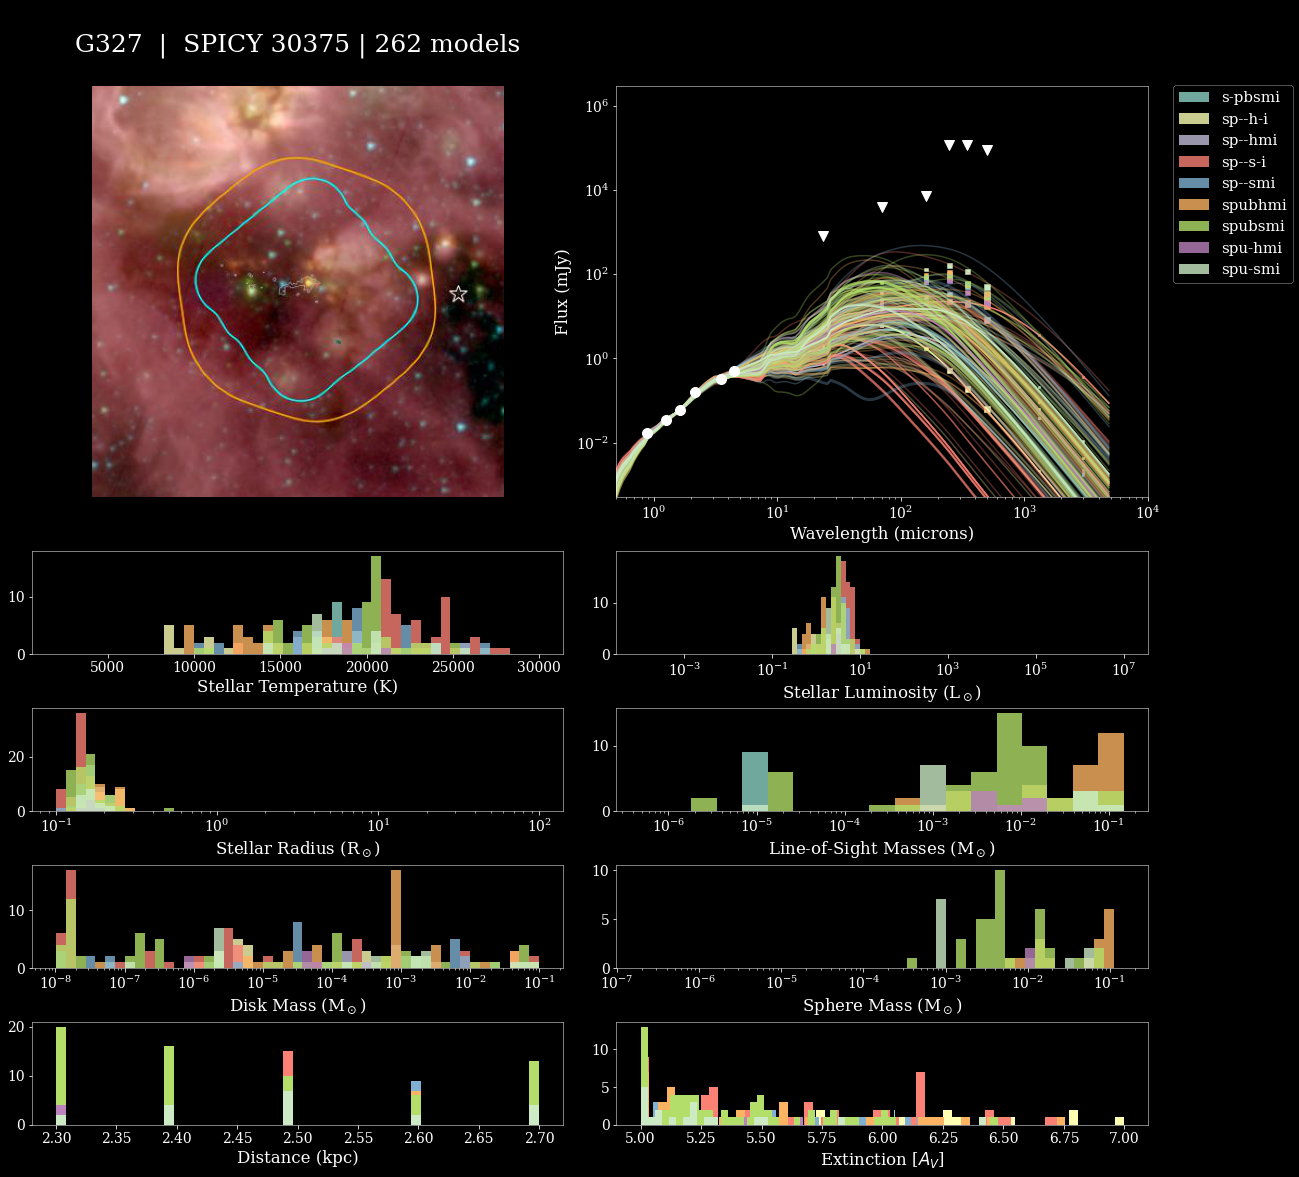

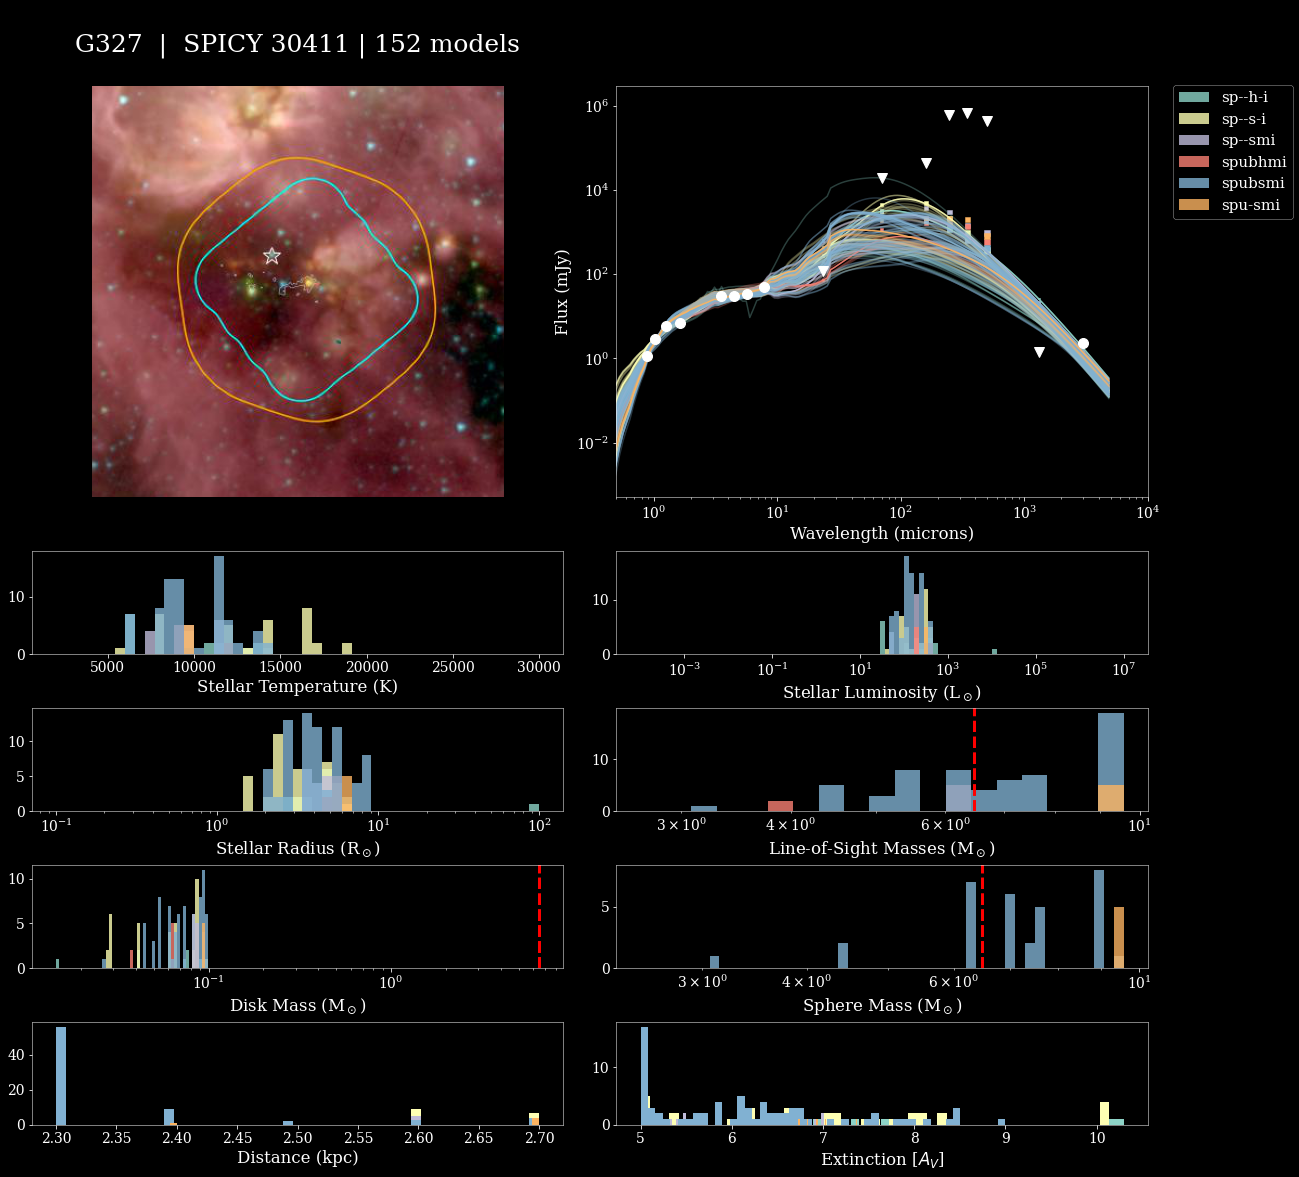

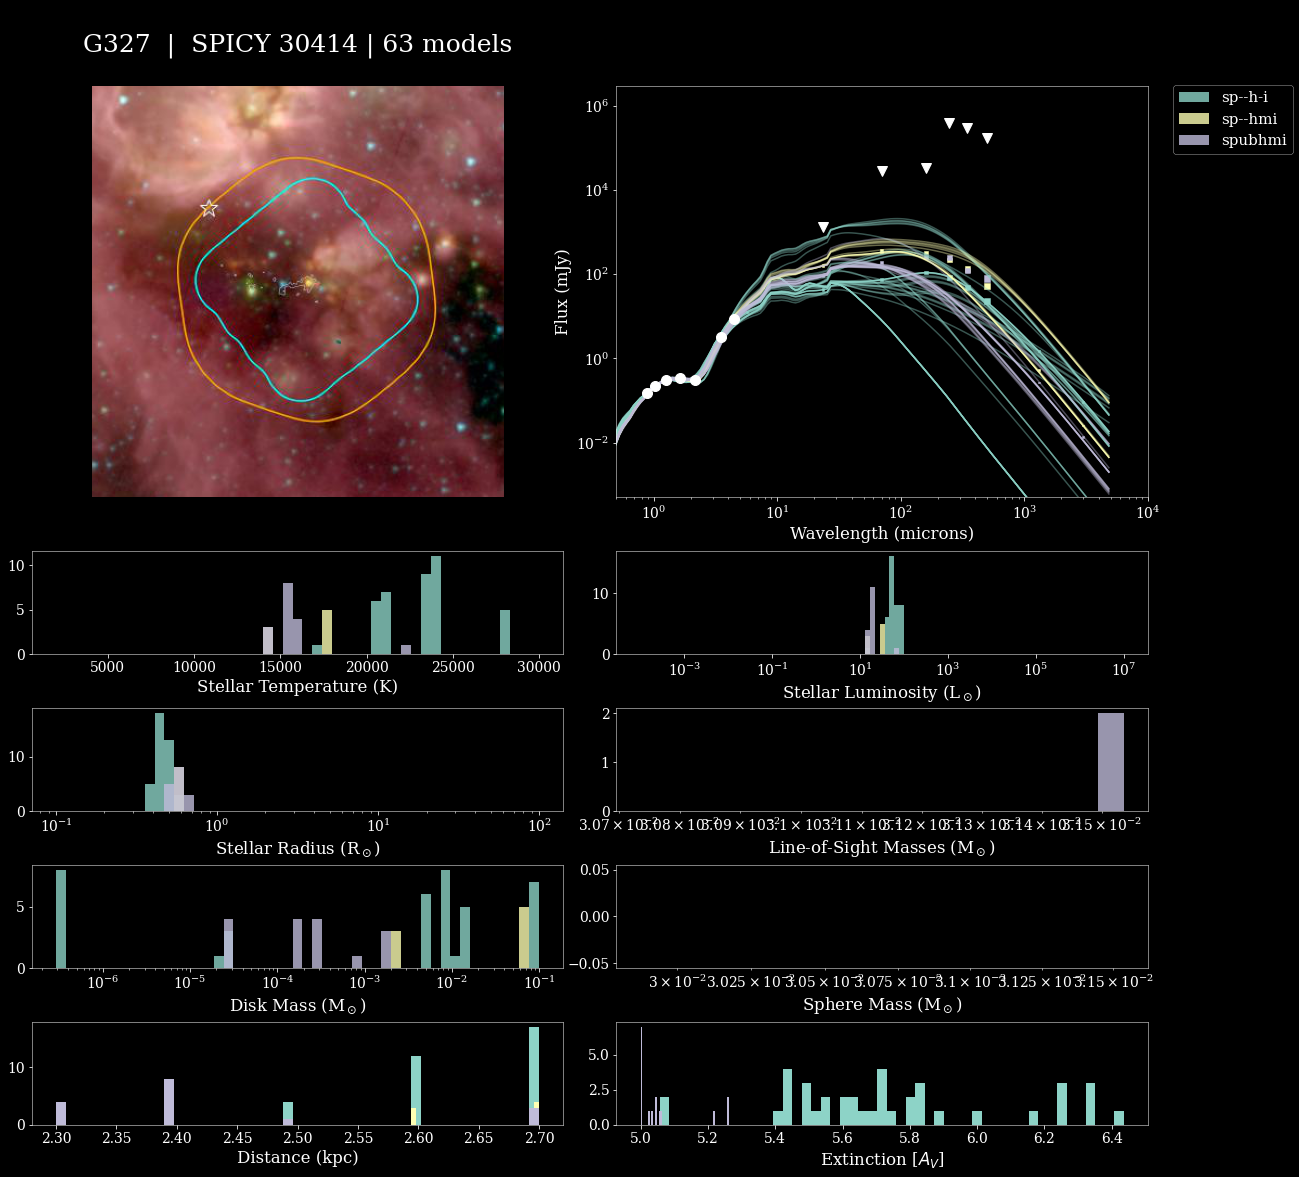

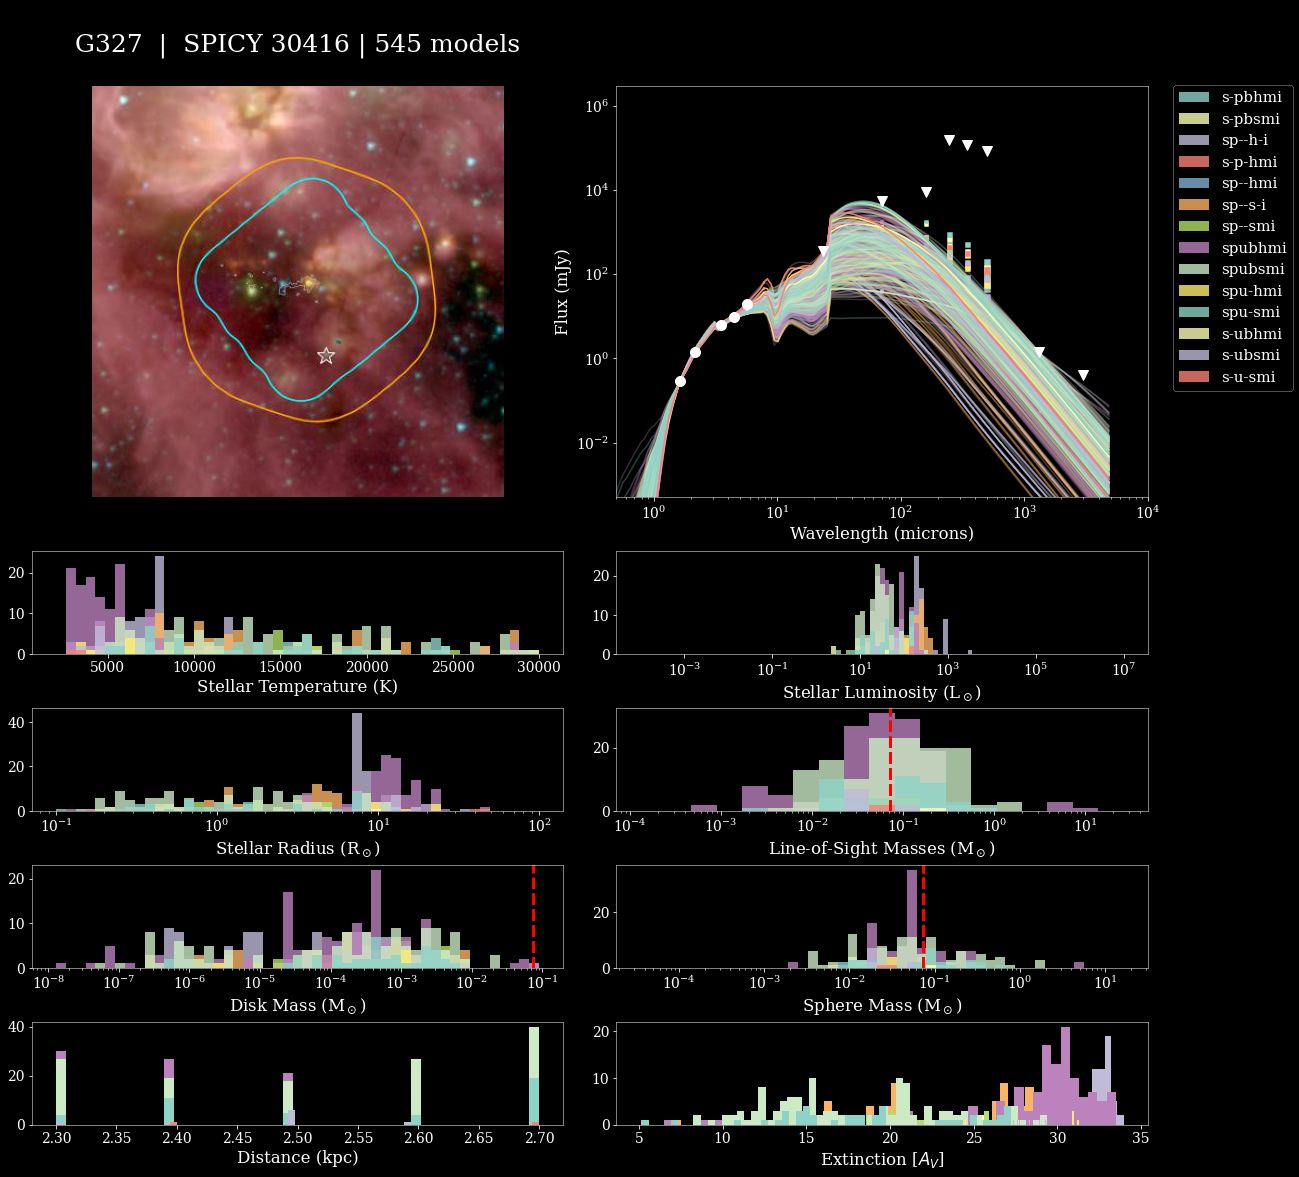

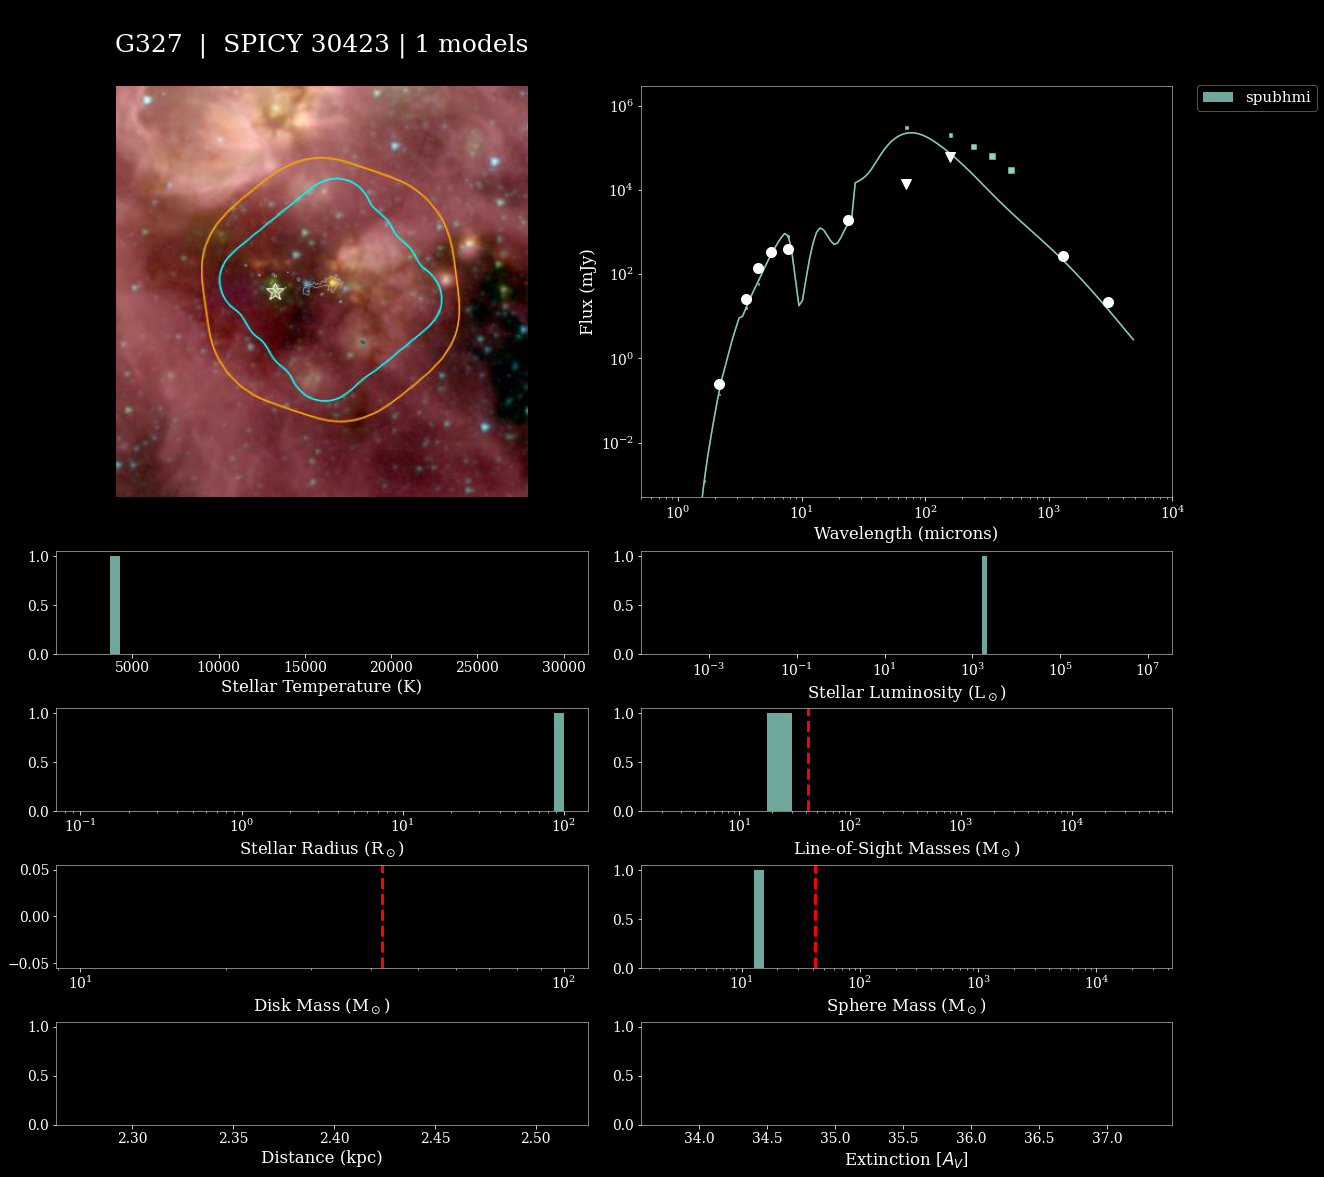

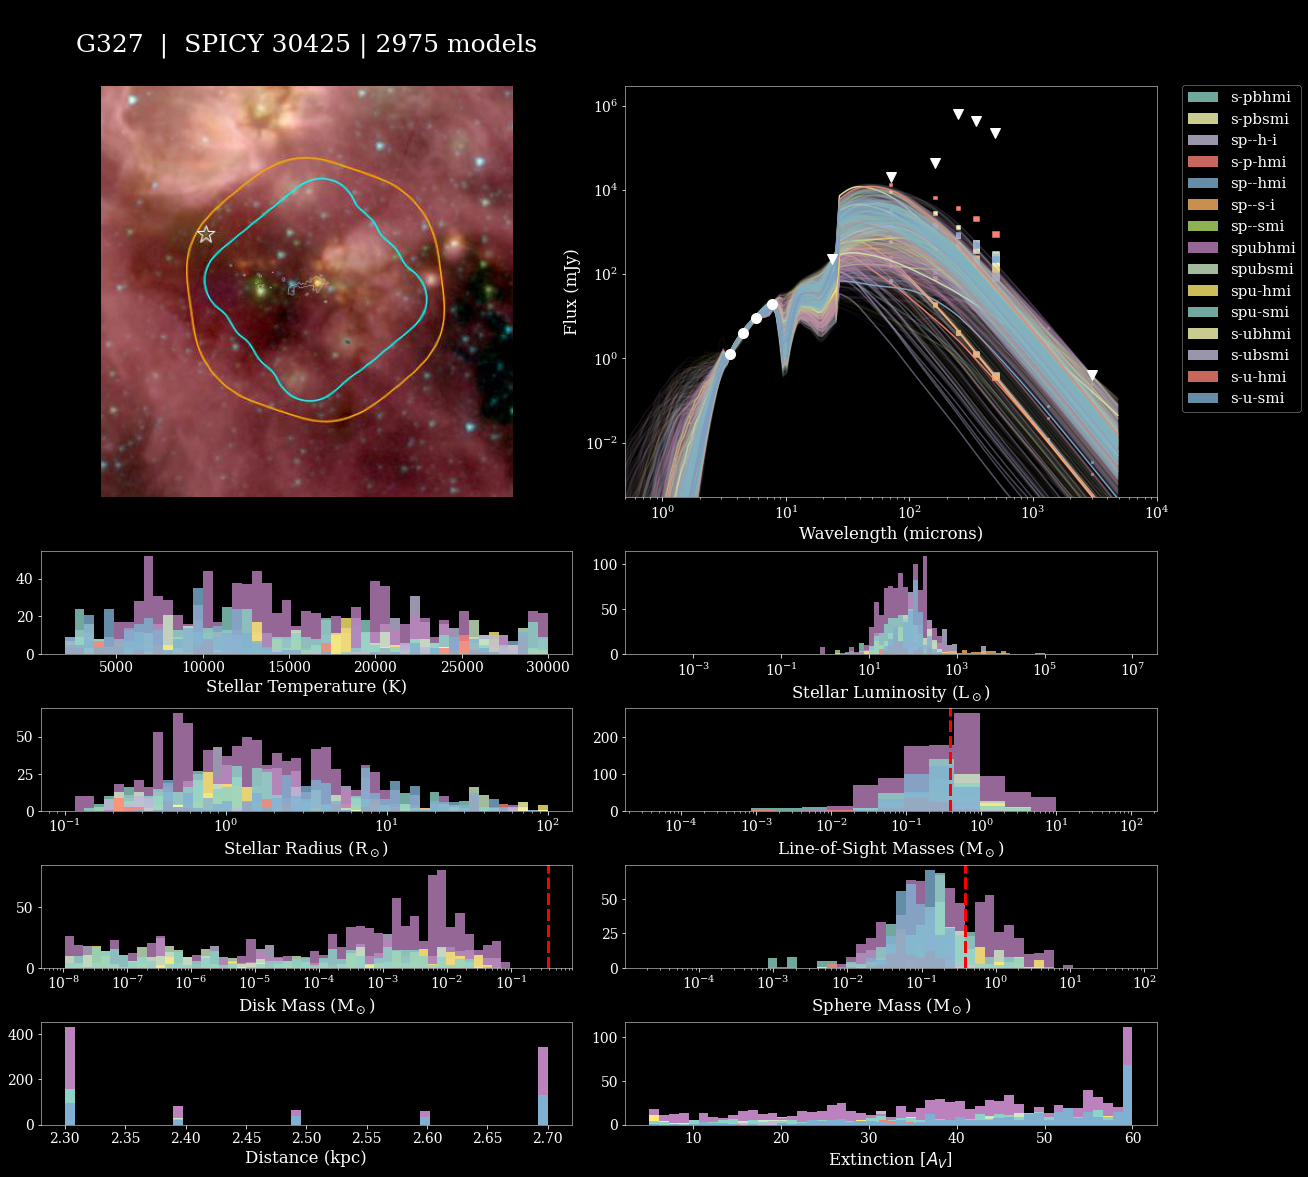

In [246]:
table_data_region = []
chi2minimums = []
chi2limits = []
okgeos = []
modelcounts = []

# ------------
# ALMA OVERRIDE
almaoverride = False
# ------------

for spicyid in tqdm_notebook(sourceids):
    if almaoverride:
        fits = full_source_fit(spicyid, av_range, distance_range, hemisphere,almaoverride=almaoverride)
        mass_ul = np.nan
    else:
        fits = full_source_fit(spicyid, av_range, distance_range, hemisphere)
        mass_ul = find_mass_ul(tbl, tbl.loc_indices[spicyid], regiondistance)/10**3
    
    chi2limit, chi2min = get_chi2limit()
    chi2limits.append(chi2limit)
    chi2minimums.append(chi2min)
    
    okgeo = get_okgeo(show=False)
    okgeos.append(okgeo)
    
    modelcount = get_modelcount(okgeo,chi2limit)
    modelcounts.append(modelcount)
    
    figure = plot_fit(fits, okgeo, filepath, chi2limit=chi2limit, fieldid=fieldid, spicyid=spicyid, modelcount=modelcount, show_all_models=True, alpha_allmodels=None, mass_ul=mass_ul)
    
    if almaoverride:
        figure.savefig(f'{filepath}/SED_plots_NoALMA/{fieldid}/{spicyid}.pdf', format="pdf")
        figure.savefig(f'{filepath}/SED_plots_NoALMA/{fieldid}/{spicyid}.jpg', format="jpg")
    else:
        figure.savefig(f'{filepath}/SED_plots/{fieldid}/{spicyid}.pdf', format="pdf")
        figure.savefig(f'{filepath}/SED_plots/{fieldid}/{spicyid}.jpg', format="jpg")
    
    all_data = []
    extinction_data, distance_data = [], []
    for geom in geometries:
        pars, data, selection = datafunction(geom, chi2limit, fits, min)
        all_data.append(data)
        distance_data.extend(10**fits[geom].sc[selection])
        extinction_data.extend(fits[geom].av[selection])
    data = table.vstack(all_data)
    
    table_data_source = {
        'means': {
            "star_temp": np.nanmean(np.log10(data['star.temperature'])),
            "model_lum": np.nanmean(np.log10(data['Model Luminosity'])),
            "star_rad": np.nanmean(np.log10(data['star.radius'])),
            "distance": np.nanmean(np.log10(distance_data)),
            "ext": np.nanmean(np.log10(extinction_data)),
            },
        'stds': {
            "star_temp": np.nanstd(np.log10(data['star.temperature'])),
            "model_lum": np.nanstd(np.log10(data['Model Luminosity'])),
            "star_rad": np.nanstd(np.log10(data['star.radius'])),
            "distance": np.nanstd(np.log10(distance_data)),
            "ext": np.nanstd(np.log10(extinction_data)),
            },
        'meds': {
            "star_temp": np.nanmedian(np.log10(data['star.temperature'])),
            "model_lum": np.nanmedian(np.log10(data['Model Luminosity'])),
            "star_rad": np.nanmedian(np.log10(data['star.radius'])),
            "distance": np.nanmedian(np.log10(distance_data)),
            "ext": np.nanmedian(np.log10(extinction_data)),
            },
        'mads': {
            "star_temp": mad_std(np.log10(data['star.temperature'])),
            "model_lum": mad_std(np.log10(data['Model Luminosity'])),
            "star_rad": mad_std(np.log10(data['star.radius'])),
            "distance": mad_std(np.log10(distance_data)),
            "ext": mad_std(np.log10(extinction_data)),
            },
        }
    try:
        table_data_source['means']['los_mass'] = np.nanmean(np.log10(data['Line-of-Sight Masses'][:,apnum]))
        table_data_source['stds']['los_mass'] = np.nanstd(np.log10(data['Line-of-Sight Masses'][:,apnum]))
        table_data_source['meds']['los_mass'] = np.nanmedian(np.log10(data['Line-of-Sight Masses'][:,apnum]))
        table_data_source['mads']['los_mass'] = mad_std(np.log10(data['Line-of-Sight Masses'][:,apnum]))
    except ValueError:
        print("Failed to grab numbers for LOS mass.")
        table_data_source['means']['los_mass'] = np.nan
        table_data_source['stds']['los_mass'] = np.nan
        table_data_source['meds']['los_mass'] = np.nan
        table_data_source['mads']['los_mass'] = np.nan
        
    try:
        table_data_source['means']['sphere_mass'] = np.nanmean(np.log10(data['Sphere Masses'][:,apnum]))
        table_data_source['stds']['sphere_mass'] = np.nanstd(np.log10(data['Sphere Masses'][:,apnum]))
        table_data_source['meds']['sphere_mass'] = np.nanmedian(np.log10(data['Sphere Masses'][:,apnum]))
        table_data_source['mads']['sphere_mass'] = mad_std(np.log10(data['Sphere Masses'][:,apnum]))
    except ValueError:
        print("Failed to grab numbers for sphere mass.")
        table_data_source['means']['sphere_mass'] = np.nan
        table_data_source['stds']['sphere_mass'] = np.nan
        table_data_source['meds']['sphere_mass'] = np.nan
        table_data_source['mads']['sphere_mass'] = np.nan
    
    table_data_region.append(table_data_source)

# Data

In [247]:
parameter_tables = []

PARAMETERS = ['star.temperature', 'Model Luminosity', 'star.radius', 'Line-of-Sight Masses', 'Sphere Masses', 'distance', 'extinction']
for y, x in enumerate(table_data_region):
    STD = [table_data_region[y]["stds"]["star_temp"], table_data_region[y]["stds"]["model_lum"], table_data_region[y]["stds"]["star_rad"], table_data_region[y]["stds"]["los_mass"], table_data_region[y]["stds"]["sphere_mass"], table_data_region[y]["stds"]["distance"], table_data_region[y]["stds"]["ext"]]
    MEAN = [table_data_region[y]["means"]["star_temp"], table_data_region[y]["means"]["model_lum"], table_data_region[y]["means"]["star_rad"], table_data_region[y]["means"]["los_mass"], table_data_region[y]["means"]["sphere_mass"], table_data_region[y]["means"]["distance"], table_data_region[y]["means"]["ext"]]
    Median = [table_data_region[y]["meds"]["star_temp"], table_data_region[y]["meds"]["model_lum"], table_data_region[y]["meds"]["star_rad"], table_data_region[y]["meds"]["los_mass"], table_data_region[y]["meds"]["sphere_mass"], table_data_region[y]["meds"]["distance"], table_data_region[y]["meds"]["ext"]]
    MAD = [table_data_region[y]["mads"]["star_temp"], table_data_region[y]["mads"]["model_lum"], table_data_region[y]["mads"]["star_rad"], table_data_region[y]["mads"]["los_mass"], table_data_region[y]["mads"]["sphere_mass"], table_data_region[y]["mads"]["distance"], table_data_region[y]["mads"]["ext"]]
    
    parameter_tables.append(Table([PARAMETERS, MEAN, STD, Median, MAD],
                            names=('Parameters', 'Mean', 'Standard Deviation','Median','Median Absolute Deviation')))
    

In [248]:
len(okgeos),len(table_data_region),len(chi2minimums),len(chi2limits),len(modelcounts)
#list.pop(0)

(6, 6, 6, 6, 6)

In [249]:
for parameter in ['Temperature','Luminosity','Radius','LOS mass','Sphere mass','Distance','Extinction']:
    for new_column_name in (f'{parameter} mean',
                            f'{parameter} standard deviation',
                            f'{parameter} Median',
                            f'{parameter} MAD'):
        if new_column_name not in tbl.colnames:
            tbl[new_column_name] = np.nan

if 'Included Geometries' not in tbl.colnames:
    tbl['Included Geometries'] = ",".join(geometries)
    
if 'Chi2 minimum' not in tbl.colnames:
    tbl['Chi2 minimum'] = np.nan

if 'Chi2 threshold' not in tbl.colnames:
    tbl['Chi2 threshold'] = np.nan

if 'NumberOfModels' not in tbl.colnames:
    tbl['NumberOfModels'] = 99999
    
for rownum, dataset in enumerate(table_data_region):
    tbl['Temperature mean'][rownum] = dataset["means"]["star_temp"]
    tbl['Temperature standard deviation'][rownum] = dataset["stds"]["star_temp"]
    tbl['Temperature Median'][rownum] = dataset["meds"]["star_temp"]
    tbl['Temperature MAD'][rownum] = dataset["mads"]["star_temp"]
    
    tbl['Luminosity mean'][rownum] = dataset["means"]["model_lum"]
    tbl['Luminosity standard deviation'][rownum] = dataset["stds"]["model_lum"]
    tbl['Luminosity Median'][rownum] = dataset["meds"]["model_lum"]
    tbl['Luminosity MAD'][rownum] = dataset["mads"]["model_lum"]
    
    tbl['Radius mean'][rownum] = dataset["means"]["star_rad"]
    tbl['Radius standard deviation'][rownum] = dataset["stds"]["star_rad"]
    tbl['Radius Median'][rownum] = dataset["meds"]["star_rad"]
    tbl['Radius MAD'][rownum] = dataset["mads"]["star_rad"]
    
    tbl['LOS mass mean'][rownum] = dataset["means"]["los_mass"]
    tbl['LOS mass standard deviation'][rownum] = dataset["stds"]["los_mass"]
    tbl['LOS mass Median'][rownum] = dataset["meds"]["los_mass"]
    tbl['LOS mass MAD'][rownum] = dataset["mads"]["los_mass"]
    
    tbl['Sphere mass mean'][rownum] = dataset["means"]["sphere_mass"]
    tbl['Sphere mass standard deviation'][rownum] = dataset["stds"]["sphere_mass"]
    tbl['Sphere mass Median'][rownum] = dataset["meds"]["sphere_mass"]
    tbl['Sphere mass MAD'][rownum] = dataset["mads"]["sphere_mass"]
    
    tbl['Distance mean'][rownum] = dataset["means"]["distance"]
    tbl['Distance standard deviation'][rownum] = dataset["stds"]["distance"]
    tbl['Distance Median'][rownum] = dataset["meds"]["distance"]
    tbl['Distance MAD'][rownum] = dataset["mads"]["distance"]
    
    tbl['Extinction mean'][rownum] = dataset["means"]["ext"]
    tbl['Extinction standard deviation'][rownum] = dataset["stds"]["ext"]
    tbl['Extinction Median'][rownum] = dataset["meds"]["ext"]
    tbl['Extinction MAD'][rownum] = dataset["mads"]["ext"]
    
for rownum, okgeo in enumerate(okgeos):
    tbl['Included Geometries'][rownum] = ",".join(okgeo)
    
for rownum, chi2min in enumerate(chi2minimums):
    tbl['Chi2 minimum'][rownum] = chi2min
    
for rownum, chi2limit in enumerate(chi2limits):
    tbl['Chi2 threshold'][rownum] = chi2limit

for rownum, modelcount in enumerate(modelcounts):
    tbl['NumberOfModels'][rownum] = modelcount

In [250]:
if not os.path.exists(f'{filepath}/Region_tables/Fitted'):
    os.makedirs(f'{filepath}/Region_tables/Fitted')
if not os.path.exists(f'{filepath}/Region_tables/Fitted_NoALMA'):
    os.makedirs(f'{filepath}/Region_tables/Fitted_NoALMA')

In [251]:
if almaoverride:
    tbl.write(f'{filepath}/Region_tables/Fitted_NoALMA/{fieldid}', format='fits', overwrite=True)
else:
    tbl.write(f'{filepath}/Region_tables/Fitted/{fieldid}', format='fits', overwrite=True)

In [90]:
tbl = Table.read(f'{filepath}/Region_tables/Fitted/{fieldid}', format='fits')
tbl.add_index('SPICY')
tbl.sort('SPICY')

# Download

In [258]:
from zipfile import ZipFile

In [259]:
len(glob.glob("SED_plots/*/*.jpg"))

118

In [260]:
fns = glob.glob('SED_plots/*/*.jpg')
with ZipFile('SED_plots.zip', 'w') as zipf:
    for fn in fns:
        zipf.write(fn)

In [261]:
fns = glob.glob('SED_plots_NoALMA/*/*.jpg')
with ZipFile('SED_plots_NoALMA.zip', 'w') as zipf:
    for fn in fns:
        zipf.write(fn)

## Parameter Histograms

In [29]:
def minmaxval(param,okgeo):
    minvals,maxvals = [],[]
    
    for geom in okgeo:
        pars_geom = Table.read(f'/blue/adamginsburg/richardson.t/research/flux/pars/{geom}_augmented.fits')
        if param in pars_geom.keys():
            if param in ('Line-of-Sight Masses','Sphere Masses'):
                data = pars_geom[param][:,apnum]
            else:
                data = pars_geom[param]
            minval,maxval = data[data>0].min(), np.nanmax(data)
            minvals.append(minval)
            maxvals.append(maxval)
    
    minval,maxval = np.nanmin(minvals), np.nanmax(maxvals)
    
    return minval,maxval

In [30]:
histparams = ['star.temperature','Model Luminosity',
              'star.radius','Line-of-Sight Masses',
              'disk.mass','Sphere Masses']
bounds = {}
for param in histparams:
    if param in pars.keys():
        minval,maxval = minmaxval(param,okgeo)
        bounds[param] = (minval, maxval)

In [31]:
def paramfig(fieldid,spicyid,fits,chi2limit,okgeo,modelcount):
    
    spicyid = tbl[rownum]['SPICY']
    fits = 
    
    basefig = plt.figure(figsize=(20, 10))
    gs = GridSpec(nrows=3, ncols=2, hspace=0.35, wspace=0.1)

    ax1 = basefig.add_subplot(gs[0, 0])
    ax2 = basefig.add_subplot(gs[0, 1])
    ax3 = basefig.add_subplot(gs[1, 0])
    ax4 = basefig.add_subplot(gs[1, 1])
    ax5 = basefig.add_subplot(gs[2, 0])
    ax6 = basefig.add_subplot(gs[2, 1])

    all_alpha = 0.05
    fit_alpha = 0.9

    for geom in okgeo:
        pars, data, selection = datafunction(geom, chi2limit, fits)
        if 'star.temperature' in pars.keys():
            bins = np.logspace(np.log10(bounds['star.temperature'][0]),np.log10(bounds['star.temperature'][1]))
            _,_,patches=ax1.hist(pars['star.temperature'], bins=bins, alpha=all_alpha, label=geom)
            ax1.hist(data['star.temperature'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
            
        if 'Model Luminosity' in pars.keys():
            bins = np.logspace(np.log10(bounds['Model Luminosity'][0]),np.log10(bounds['Model Luminosity'][1]))
            _,_,patches=ax2.hist(pars['Model Luminosity'], bins=bins, alpha=all_alpha, label=geom)
            ax2.hist(data['Model Luminosity'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
            
        if 'star.radius' in pars.keys():
            bins = np.logspace(np.log10(bounds['star.radius'][0]),np.log10(bounds['star.radius'][1]))
            _,_,patches=ax3.hist(pars['star.radius'], bins=bins, alpha=all_alpha, label=geom)
            ax3.hist(data['star.radius'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
            
        if 'Line-of-Sight Masses' in pars.keys():
            bins = np.logspace(np.log10(bounds['Line-of-Sight Masses'][0]),np.log10(bounds['Line-of-Sight Masses'][1]))
            _,_,patches=ax4.hist(pars['Line-of-Sight Masses'][:,apnum], bins=bins, alpha=all_alpha, label=geom)
            ax4.hist(data['Line-of-Sight Masses'][:,apnum], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
            
        if 'disk.mass' in pars.keys():
            bins = np.logspace(np.log10(bounds['disk.mass'][0]),np.log10(bounds['disk.mass'][1]))
            _,_,patches=ax5.hist(pars['disk.mass'], bins=bins, alpha=all_alpha, label=geom)
            ax5.hist(data['disk.mass'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
    
        if 'Sphere Masses' in pars.keys():
            bins = np.logspace(np.log10(bounds['Sphere Masses'][0]),np.log10(bounds['Sphere Masses'][1]))
            _,_,patches=ax6.hist(pars['Sphere Masses'][:,apnum], bins=bins, alpha=all_alpha, label=geom)
            ax6.hist(data['Sphere Masses'][:,apnum], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())

    ax1.loglog()
    ax2.loglog()
    ax3.loglog()
    ax4.loglog()
    ax5.loglog()
    ax6.loglog()

    handles, labels = ax1.get_legend_handles_labels()

    legend = ax2.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.16,1.08))
    for lh in legend.legendHandles:
        lh.set_alpha(fit_alpha)

    ax1.set_xlabel("Stellar Temperature (K)")
    ax2.set_xlabel("Stellar Luminosity (L$_\odot$)")
    ax3.set_xlabel("Stellar Radius (R$_\odot$)")
    ax4.set_xlabel("Line-of-Sight Masses* (M$_\odot$)")
    ax5.set_xlabel("Disk Mass (M$_\odot$)")
    ax6.set_xlabel("Sphere Mass* (M$_\odot$)")

    # $^1$ for superscript

    ttl = ax1.set_title(f'\n{fieldid}  |  SPICY {spicyid} | {modelcount} models\n', fontsize=25)

    #ax6.text(0.0, 0.0, f'Line-of-sight mass and Sphere mass assume aperture size of {sedcube.apertures[9].round(0)}', ha="center", fontsize=18)

    footnote = ax6.set_title(f'* Mass parameters assume aperture size of {sedcube.apertures[9].round(0)}\n', fontsize=13)
    footnote.set_position([0.5, -0.6])

SyntaxError: invalid syntax (<ipython-input-31-580f11cb0372>, line 4)